In [26]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 100)

import community
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
from IPython.display import Image

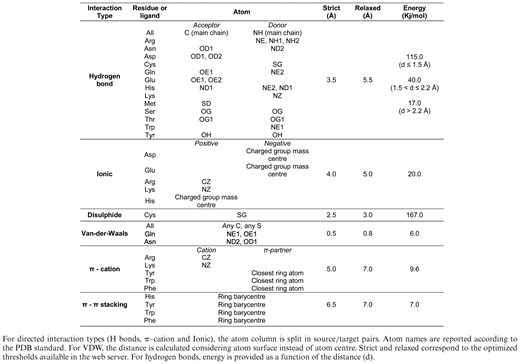

In [43]:
Image('./RING_bonds.png')

In [38]:
SaCe_rPro_nodes = pd.read_csv('./SC_LSU_Protein_sup_AES_nodes.txt', sep='\t').drop(['pdbFileName'], axis=1)
SaCe_rPro_nodes

,NodeId,Chain,Position,Residue,Dssp,Degree,Bfactor_CA,x,y,z,Rapdf,Tap,Accessibility
0,A:3:_:ARG,A,3,ARG,,3,44.53,-23.242,145.781,140.369,-58.079,-0.052,0.536
1,A:4:_:VAL,A,4,VAL,,2,36.89,-20.489,147.173,138.130,34.829,0.037,0.293
2,A:5:_:ILE,A,5,ILE,,5,33.84,-20.039,144.590,135.428,0.543,-1.155,0.041
3,A:6:_:ARG,A,6,ARG,H,2,39.48,-16.807,142.987,134.443,21.172,0.259,0.274
4,A:7:_:ASN,A,7,ASN,H,1,50.43,-16.438,144.840,131.244,-14.251,0.035,0.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,q:190:_:VAL,q,190,VAL,E,4,108.51,-146.683,63.539,185.996,-142.626,0.394,-999.900
5555,q:191:_:TYR,q,191,TYR,E,6,111.78,-148.854,66.621,185.608,-117.467,0.044,-999.900
5556,q:192:_:ASP,q,192,ASP,E,1,231.62,-152.572,66.436,184.809,-16.067,0.492,-999.900
5557,q:196:_:VAL,q,196,VAL,E,1,133.47,-148.457,66.168,190.487,0.837,-0.690,-999.900


In [39]:
SaCe_rPro_edges = pd.read_csv('./SC_LSU_Protein_sup_AES_edges.txt', sep='\t')
SaCe_rPro_edges

,NodeId1,Interaction,NodeId2,Distance,Angle,Energy,Atom1,Atom2,Donor,Positive,Cation,Orientation
0,A:3:_:ARG,HBOND:MC_MC,A:207:_:VAL,2.883,28.068,17.0,N,O,A:3:_:ARG,NaN,NaN,NaN
1,A:3:_:ARG,VDW:SC_MC,A:207:_:VAL,4.021,-999.900,6.0,CB,C,NaN,NaN,NaN,NaN
2,A:3:_:ARG,HBOND:SC_SC,A:208:_:ASP,2.734,21.088,17.0,NE,OD2,A:3:_:ARG,NaN,NaN,NaN
3,A:4:_:VAL,VDW:SC_SC,A:8:_:GLN,3.573,-999.900,6.0,CG1,CB,NaN,NaN,NaN,NaN
4,A:4:_:VAL,VDW:SC_SC,A:9:_:ARG,3.456,-999.900,6.0,CG1,CG,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10061,q:187:_:VAL,VDW:SC_SC,q:190:_:VAL,3.731,-999.900,6.0,CG1,CG2,NaN,NaN,NaN,NaN
10062,q:189:_:GLN,VDW:SC_MC,q:196:_:VAL,3.317,-999.900,6.0,OE1,C,NaN,NaN,NaN,NaN
10063,q:189:_:GLN,VDW:SC_MC,q:197:_:PHE,3.639,-999.900,6.0,OE1,C,NaN,NaN,NaN,NaN
10064,q:190:_:VAL,HBOND:MC_MC,q:197:_:PHE,3.079,34.952,17.0,O,N,q:197:_:PHE,NaN,NaN,NaN


In [2]:
G = nx.read_graphml('./SC_LSU_Protein_sup_AES_network.xml')

In [57]:
G.nodes['n0']

{'Accessibility': 0.536,
 'Bfactor_CA': 44.53,
 'Chain': 'A',
 'Degree': 3.0,
 'Dssp': ' ',
 'NodeId': 'A:3:_:ARG',
 'Position': 3.0,
 'Rapdf': -58.079,
 'Residue': 'ARG',
 'Tap': -0.052,
 'name': 'A:3:_:ARG',
 'pdbFileName': 'SC_LSU_Protein_sup_AES.pdb#3.A',
 'x': -23.242,
 'y': 145.781,
 'z': 140.369}

In [64]:
G.edges[('n0', 'n186', 0)]

{'Angle': 28.068,
 'Atom1': 'N',
 'Atom2': 'O',
 'Cation': 'None',
 'Distance': 2.883,
 'Donor': 'A:3:_:ARG',
 'Energy': 17.0,
 'Interaction': 'HBOND:MC_MC',
 'NodeId1': 'A:3:_:ARG',
 'NodeId2': 'A:207:_:VAL',
 'Orientation': 'None',
 'Positive': 'None'}

In [69]:
def print_top_bottom_5(metric):
    top5 = {key: metric[key] for key in sorted(metric, key=metric.get, reverse=True)[:5]}
    bottom5 = {key: metric[key] for key in sorted(metric, key=metric.get, reverse=False)[:5]}
    print('top5:')
    for x in top5:
        print(x, '\t', top5[x])
    print('bottom5:')
    for x in bottom5:
        print(x, '\t', bottom5[x])

In [90]:
def print_centrality(graph):
    degree = nx.degree_centrality(graph)
    closeness = nx.closeness_centrality(graph)
    harmonic = nx.harmonic_centrality(graph)
    betweenness = nx.betweenness_centrality(graph)
    #eigenvector = nx.eigenvector_centrality(graph, max_iter=1000)
    print('degree:')
    print_top_bottom_5(degree)
    print('\ncloseness:')
    print_top_bottom_5(closeness)
    print('\nharmonic:')
    print_top_bottom_5(harmonic)
    print('\nbetweenness:')
    print_top_bottom_5(betweenness)
    #print('\neigenvector:')
    #print_top5(eigenvector)

In [91]:
print_centrality(G)

degree:
top5:

n5264 	 0.003598416696653472
n5366 	 0.003238575026988125
n5109 	 0.0030586541921554513
n5451 	 0.0028787333573227778
n2835 	 0.002338970852824757
bottom5:

n4 	 0.0001799208348326736
n8 	 0.0001799208348326736
n9 	 0.0001799208348326736
n11 	 0.0001799208348326736
n12 	 0.0001799208348326736

closeness:
top5:

n2394 	 0.015221444085545835
n2793 	 0.015163888321279084
n2409 	 0.015126608024661923
n2390 	 0.015120497292586651
n2398 	 0.015029425199139584
bottom5:

n12 	 0.0001799208348326736
n57 	 0.0001799208348326736
n177 	 0.0001799208348326736
n209 	 0.0001799208348326736
n308 	 0.0001799208348326736

harmonic:
top5:

n2403 	 130.16267292674806
n2627 	 128.15909621403355
n2380 	 127.94253128935327
n2398 	 127.79705900682195
n2682 	 127.01086019959064
bottom5:

n12 	 1.0
n57 	 1.0
n177 	 1.0
n209 	 1.0
n308 	 1.0

betweenness:
top5:

n2394 	 0.037965858892006446
n2380 	 0.03568098529697467
n2390 	 0.0355309465074485
n2386 	 0.03516612446306838
n282 	 0.0338512088802464

In [72]:
partition = community.best_partition(G)

In [75]:
induced_graph = community.induced_graph(partition, G)

In [77]:
induced_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159))

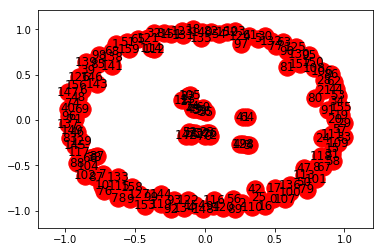

In [78]:
nx.draw_networkx(induced_graph)

In [82]:
induced_graph.nodes[0]

{}

In [83]:
induced_graph.edges

EdgeView([(0, 0), (1, 1), (2, 2), (3, 3), (3, 4), (3, 128), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (11, 12), (11, 13), (11, 14), (12, 12), (13, 13), (13, 22), (13, 105), (14, 14), (14, 43), (14, 45), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (22, 105), (23, 23), (23, 26), (23, 27), (24, 24), (25, 25), (26, 26), (26, 72), (27, 27), (27, 70), (27, 73), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (35, 36), (36, 36), (36, 59), (37, 37), (37, 38), (38, 38), (38, 66), (39, 39), (40, 40), (41, 41), (41, 64), (42, 42), (43, 43), (43, 45), (43, 59), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (49, 128), (50, 50), (51, 51), (52, 52), (52, 55), (53, 53), (54, 54), (55, 55), (55, 75), (55, 73), (55, 142), (56, 56), (57, 57), (58, 58), (59, 59), (59, 60), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (70, 72), (71, 71)

In [85]:
induced_graph.edges[(0,0)]

{'weight': 44}

In [48]:
name_chains = pd.read_csv('./PDB_SaCe_LSU_rPro_chain_names.csv', names=['rProtein', 'Chain'])

In [56]:
SaCe_rPro_edges = pd.read_csv("./SC_LSU_Protein_sup_AES_edges.txt", sep="\t")
SaCe_rPro_nodes = pd.read_csv("./SC_LSU_Protein_sup_AES_nodes.txt", sep="\t")

In [57]:
SaCe_rPro_nodes.drop(['pdbFileName'], axis=1, inplace=True)

In [58]:
SaCe_rPro_nodes

,NodeId,Chain,Position,Residue,Dssp,Degree,Bfactor_CA,x,y,z,Rapdf,Tap,Accessibility
0,A:3:_:ARG,A,3,ARG,,3,44.53,-23.242,145.781,140.369,-58.079,-0.052,0.536
1,A:4:_:VAL,A,4,VAL,,2,36.89,-20.489,147.173,138.130,34.829,0.037,0.293
2,A:5:_:ILE,A,5,ILE,,5,33.84,-20.039,144.590,135.428,0.543,-1.155,0.041
3,A:6:_:ARG,A,6,ARG,H,2,39.48,-16.807,142.987,134.443,21.172,0.259,0.274
4,A:7:_:ASN,A,7,ASN,H,1,50.43,-16.438,144.840,131.244,-14.251,0.035,0.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,q:190:_:VAL,q,190,VAL,E,4,108.51,-146.683,63.539,185.996,-142.626,0.394,-999.900
5555,q:191:_:TYR,q,191,TYR,E,6,111.78,-148.854,66.621,185.608,-117.467,0.044,-999.900
5556,q:192:_:ASP,q,192,ASP,E,1,231.62,-152.572,66.436,184.809,-16.067,0.492,-999.900
5557,q:196:_:VAL,q,196,VAL,E,1,133.47,-148.457,66.168,190.487,0.837,-0.690,-999.900


In [30]:
SaCe_rPro_nodes.rename(columns=)

,NodeId,Chain,Position,Residue,Dssp,Degree,Bfactor_CA,x,y,z,pdbFileName,Rapdf,Tap,Accessibility
0,A:3:_:ARG,A,3,ARG,,3,44.53,-23.242,145.781,140.369,SC_LSU_Protein_sup_AES.pdb#3.A,-58.079,-0.052,0.536
1,A:4:_:VAL,A,4,VAL,,2,36.89,-20.489,147.173,138.130,SC_LSU_Protein_sup_AES.pdb#4.A,34.829,0.037,0.293
2,A:5:_:ILE,A,5,ILE,,5,33.84,-20.039,144.590,135.428,SC_LSU_Protein_sup_AES.pdb#5.A,0.543,-1.155,0.041
3,A:6:_:ARG,A,6,ARG,H,2,39.48,-16.807,142.987,134.443,SC_LSU_Protein_sup_AES.pdb#6.A,21.172,0.259,0.274
4,A:7:_:ASN,A,7,ASN,H,1,50.43,-16.438,144.840,131.244,SC_LSU_Protein_sup_AES.pdb#7.A,-14.251,0.035,0.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,q:190:_:VAL,q,190,VAL,E,4,108.51,-146.683,63.539,185.996,SC_LSU_Protein_sup_AES.pdb#190.q,-142.626,0.394,-999.900
5555,q:191:_:TYR,q,191,TYR,E,6,111.78,-148.854,66.621,185.608,SC_LSU_Protein_sup_AES.pdb#191.q,-117.467,0.044,-999.900
5556,q:192:_:ASP,q,192,ASP,E,1,231.62,-152.572,66.436,184.809,SC_LSU_Protein_sup_AES.pdb#192.q,-16.067,0.492,-999.900
5557,q:196:_:VAL,q,196,VAL,E,1,133.47,-148.457,66.168,190.487,SC_LSU_Protein_sup_AES.pdb#196.q,0.837,-0.690,-999.900


In [31]:
SaCe_rPro_edges

,NodeId1,Interaction,NodeId2,Distance,Angle,Energy,Atom1,Atom2,Donor,Positive,Cation,Orientation
0,A:3:_:ARG,HBOND:MC_MC,A:207:_:VAL,2.883,28.068,17.0,N,O,A:3:_:ARG,NaN,NaN,NaN
1,A:3:_:ARG,VDW:SC_MC,A:207:_:VAL,4.021,-999.900,6.0,CB,C,NaN,NaN,NaN,NaN
2,A:3:_:ARG,HBOND:SC_SC,A:208:_:ASP,2.734,21.088,17.0,NE,OD2,A:3:_:ARG,NaN,NaN,NaN
3,A:4:_:VAL,VDW:SC_SC,A:8:_:GLN,3.573,-999.900,6.0,CG1,CB,NaN,NaN,NaN,NaN
4,A:4:_:VAL,VDW:SC_SC,A:9:_:ARG,3.456,-999.900,6.0,CG1,CG,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10061,q:187:_:VAL,VDW:SC_SC,q:190:_:VAL,3.731,-999.900,6.0,CG1,CG2,NaN,NaN,NaN,NaN
10062,q:189:_:GLN,VDW:SC_MC,q:196:_:VAL,3.317,-999.900,6.0,OE1,C,NaN,NaN,NaN,NaN
10063,q:189:_:GLN,VDW:SC_MC,q:197:_:PHE,3.639,-999.900,6.0,OE1,C,NaN,NaN,NaN,NaN
10064,q:190:_:VAL,HBOND:MC_MC,q:197:_:PHE,3.079,34.952,17.0,O,N,q:197:_:PHE,NaN,NaN,NaN


In [32]:
Network_SaCe_rPro = nx.from_pandas_edgelist(SaCe_rPro_edges, source='NodeId1', target='NodeId2')

In [29]:
SaCe_rPro_nodes = SaCe_rPro_nodes[(SaCe_rPro_nodes.x > -999) | (SaCe_rPro_nodes.y > -999)  | (SaCe_rPro_nodes.z > -999)]

In [33]:
G_SaCe_rPro = nx.Graph(Network_SaCe_rPro)

In [34]:
partition = community.best_partition(G_SaCe_rPro)

In [35]:
partition

{'A:3:_:ARG': 0,
 'A:207:_:VAL': 0,
 'A:208:_:ASP': 0,
 'A:4:_:VAL': 0,
 'A:8:_:GLN': 0,
 'A:9:_:ARG': 0,
 'A:5:_:ILE': 0,
 'A:232:_:GLY': 0,
 'A:6:_:ARG': 0,
 'A:10:_:LYS': 0,
 'A:7:_:ASN': 1,
 'A:234:_:LYS': 1,
 'A:11:_:GLY': 0,
 'A:231:_:SER': 0,
 'A:12:_:ALA': 0,
 'A:16:_:PHE': 0,
 'A:13:_:GLY': 0,
 'A:17:_:THR': 0,
 'A:14:_:SER': 0,
 'A:15:_:ILE': 2,
 'A:194:_:ASN': 2,
 'A:18:_:SER': 3,
 'A:23:_:ARG': 3,
 'A:19:_:HIS': 3,
 'A:192:_:LYS': 3,
 'A:193:_:ARG': 3,
 'A:20:_:THR': 3,
 'A:22:_:LEU': 3,
 'A:52:_:SER': 3,
 'A:191:_:LEU': 3,
 'A:24:_:GLN': 4,
 'A:49:_:VAL': 4,
 'A:51:_:ASP': 4,
 'A:58:_:LEU': 4,
 'A:60:_:LYS': 4,
 'A:25:_:GLY': 4,
 'A:75:_:ILE': 4,
 'A:27:_:ALA': 4,
 'A:77:_:ILE': 4,
 'A:128:_:ARG': 4,
 'A:28:_:LYS': 4,
 'A:123:_:ARG': 4,
 'A:29:_:LEU': 4,
 'A:117:_:GLU': 4,
 'A:165:_:VAL': 4,
 'A:30:_:ARG': 4,
 'A:33:_:ASP': 4,
 'A:36:_:GLU': 4,
 'A:63:_:PHE': 4,
 'A:74:_:GLU': 4,
 'A:31:_:THR': 4,
 'A:32:_:LEU': 4,
 'A:163:_:ARG': 4,
 'A:37:_:ARG': 4,
 'A:34:_:TYR': 4,
 'A

In [38]:
print_centrality(G_SaCe_rPro)

degree:
m:500:_:ZN 	 0.003598416696653472
o:501:_:ZN 	 0.003238575026988125
j:501:_:ZN 	 0.0030586541921554513
p:501:_:ZN 	 0.0028787333573227778
H:157:_:ASN 	 0.001799208348326736

closeness:
M:108:_:ARG 	 0.015221444085545835
O:197:_:PHE 	 0.015163888321279084
M:123:_:LEU 	 0.015126608024661923
M:104:_:ALA 	 0.015120497292586651
M:112:_:LEU 	 0.015029425199139584

harmonic:
M:117:_:ARG 	 130.16267292674806
O:23:_:VAL 	 128.15909621403355
M:94:_:TRP 	 127.94253128935327
M:112:_:LEU 	 127.79705900682195
O:80:_:PHE 	 127.01086019959064

betweenness:
M:108:_:ARG 	 0.03796585889200643
M:94:_:TRP 	 0.0356809852969747
M:104:_:ALA 	 0.035530946507448515
M:100:_:ALA 	 0.035166124463068354
B:92:_:TYR 	 0.03385120888024649

eigenvector:
m:500:_:ZN 	 0.5320483326892543
m:96:_:CYS 	 0.3275032981890927
m:115:_:CYS 	 0.3012632337634988
m:110:_:CYS 	 0.2782408895651641
m:118:_:THR 	 0.2434433495732681


In [39]:
def plot_nodes_edges(df):    
    
    trace1 = go.Scatter3d(
            x = df['x'],
            y = df['y'],
            z = df['z'],
            text = df['Residue']+' '+df['Dssp']+' '+df['Chain'],
            mode = 'markers'
            )

    layout = go.Layout(
        title = 'Atomic Interactions',
        showlegend = True
    )

    data=go.Data([trace1])
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [40]:
plot_nodes_edges(SaCe_rPro_nodes)

In [41]:
SaCe_rPro_nodes.sort_values('x')

,NodeId,Chain,Position,Residue,Dssp,Degree,Bfactor_CA,x,y,z,pdbFileName,Rapdf,Tap,Accessibility
5534,q:91:_:GLU,q,91,GLU,S,2,129.84,-154.818,60.059,175.533,SC_LSU_Protein_sup_AES.pdb#91.q,-12.002,-1.123,0.269
5533,q:90:_:ASN,q,90,ASN,S,4,95.80,-154.535,63.859,175.641,SC_LSU_Protein_sup_AES.pdb#90.q,-29.874,-0.015,0.369
5472,q:23:_:LYS,q,23,LYS,S,2,138.34,-154.171,68.628,179.202,SC_LSU_Protein_sup_AES.pdb#23.q,-96.535,0.343,0.831
5470,q:21:_:GLU,q,21,GLU,H,2,118.42,-153.265,72.058,173.616,SC_LSU_Protein_sup_AES.pdb#21.q,-81.798,0.025,0.534
1069,D:260:_:PHE,D,260,PHE,S,3,80.10,-152.911,172.503,145.978,SC_LSU_Protein_sup_AES.pdb#260.D,0.878,0.062,0.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,k:61:_:LYS,k,61,LYS,H,4,115.12,72.243,121.858,158.201,SC_LSU_Protein_sup_AES.pdb#61.k,-62.844,0.073,0.424
5165,k:68:_:SER,k,68,SER,H,3,101.83,72.719,132.172,161.661,SC_LSU_Protein_sup_AES.pdb#68.k,-48.557,0.694,0.265
5157,k:60:_:GLY,k,60,GLY,H,2,100.13,72.847,118.658,160.223,SC_LSU_Protein_sup_AES.pdb#60.k,-52.832,-0.309,0.490
5164,k:67:_:GLN,k,67,GLN,H,1,113.05,73.154,130.014,164.804,SC_LSU_Protein_sup_AES.pdb#67.k,-104.529,0.297,0.796


In [55]:
pd.merge(SaCe_rPro_nodes, name_chains, on='Chain').drop(['pdbFileName', 'Chain'], axis=1)

,NodeId,Position,Residue,Dssp,Degree,Bfactor_CA,x,y,z,Rapdf,Tap,Accessibility,rProtein
0,A:3:_:ARG,3,ARG,,3,44.53,-23.242,145.781,140.369,-58.079,-0.052,0.536,uL02
1,A:4:_:VAL,4,VAL,,2,36.89,-20.489,147.173,138.130,34.829,0.037,0.293,uL02
2,A:5:_:ILE,5,ILE,,5,33.84,-20.039,144.590,135.428,0.543,-1.155,0.041,uL02
3,A:6:_:ARG,6,ARG,H,2,39.48,-16.807,142.987,134.443,21.172,0.259,0.274,uL02
4,A:7:_:ASN,7,ASN,H,1,50.43,-16.438,144.840,131.244,-14.251,0.035,0.328,uL02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,q:190:_:VAL,190,VAL,E,4,108.51,-146.683,63.539,185.996,-142.626,0.394,-999.900,uL10
5551,q:191:_:TYR,191,TYR,E,6,111.78,-148.854,66.621,185.608,-117.467,0.044,-999.900,uL10
5552,q:192:_:ASP,192,ASP,E,1,231.62,-152.572,66.436,184.809,-16.067,0.492,-999.900,uL10
5553,q:196:_:VAL,196,VAL,E,1,133.47,-148.457,66.168,190.487,0.837,-0.690,-999.900,uL10
